# Building a song recommender¶
## Fire up GraphLab Create

In [1]:
import graphlab
# Limit number of worker processes. This preserves system memory, which prevents hosted notebooks from crashing.
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
/opt/conda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/opt/conda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:266: SubjectAltNameWarning: Certificate for beta.graphlab.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1513632367.log


This non-commercial license of GraphLab Create for academic use is assigned to mlsdsree@gmail.com and will expire on December 09, 2018.


## Load music data

In [2]:
song_data = graphlab.SFrame('song_data.gl/')

## Explore data

Music data shows how many times a user listened to a song, as well as the details of the song.

In [3]:
song_data.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Assignment Counting unique users: 
## Number of kanye west unique users

In [5]:
kanye = song_data[song_data['artist'] == 'Kanye West']

In [6]:
kanye.head()

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOMLMKI12A81C204BC,1,Champion,Kanye West
5d5e0142e54c3bb7b69f548c2ee55066c90700eb ...,SORFASW12A81C22AE7,2,Stronger,Kanye West
537340ff896dea11328910013cfe759413e1eeb3 ...,SOBXHDL12A81C204C0,2,Stronger,Kanye West
7dd192c8bd4f27f573cb15e8656442aadd7a9c01 ...,SOOLPFK12A58A7BDE3,5,Flashing Lights,Kanye West
8fce200f3912e9608e3b1463cdb9c3529aab5c08 ...,SOBXHDL12A81C204C0,2,Stronger,Kanye West
8fce200f3912e9608e3b1463cdb9c3529aab5c08 ...,SOIBSWV12A6D4F6AB3,1,Through The Wire,Kanye West
a56bf59af6edc5ae6c92d61ddd214989332864e8 ...,SONGNHO12AB0183915,1,Bad News,Kanye West
8fa25e588aeedaa539674babb75729ac9f31f15e ...,SOOLPFK12A58A7BDE3,1,Flashing Lights,Kanye West
e8612acfb1572297ea0eaaa1f27927d55fdcec65 ...,SOIYWPZ12A81C204EF,2,Homecoming,Kanye West


In [8]:
kanye_users = kanye['user_id'].unique()

In [11]:
len(kanye_users)

2522

## Number of foo fighters unique users

In [12]:
foo = song_data[song_data['artist'] == 'Foo Fighters']
foo_users = foo['user_id'].unique()
len(foo_users)

2055

## Number of taylor swift unique users

In [13]:
swift = song_data[song_data['artist'] == 'Taylor Swift']
swift_users = swift['user_id'].unique()
len(swift_users)

3246

## Number of Lady GaGa unique users

In [14]:
gaga = song_data[song_data['artist'] == 'Lady GaGa']
gaga_users = gaga['user_id'].unique()
len(gaga_users)

2928

## Assignment_Using groupby-aggregate to find the most popular and least popular artist:

In [18]:
#most popular artist
song_data.groupby(key_columns='artist', operations={'total_count': graphlab.aggregate.SUM('listen_count')}).sort('total_count', ascending = False)

artist,total_count
Kings Of Leon,43218
Dwight Yoakam,40619
Björk,38889
Coldplay,35362
Florence + The Machine,33387
Justin Bieber,29715
Alliance Ethnik,26689
OneRepublic,25754
Train,25402
The Black Keys,22184


In [19]:
#least popular artist
song_data.groupby(key_columns='artist', operations={'total_count': graphlab.aggregate.SUM('listen_count')}).sort('total_count', ascending = True)

artist,total_count
William Tabbert,14
Reel Feelings,24
Beyoncé feat. Bun B andSlim Thug ...,26
Boggle Karaoke,30
Diplo,30
harvey summers,31
Nâdiya,36
Jody Bernal,38
Aneta Langerova,38
Kanye West / Talib Kweli/ Q-Tip / Common / ...,38


## Assignment_Using groupby-aggregate to find the most recommended songs:

In [20]:
train_data,test_data = song_data.random_split(.8,seed=0)

In [21]:
personalized_model = graphlab.item_similarity_recommender.create(train_data,
                                                                user_id='user_id',
                                                                item_id='song')

Recsys training: model = item_similarity

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 2.08905s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.171ms                        | 1.5        |

| 71.751ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 839.032ms                           | 0                | 0               |

| 3.02s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 4.22018s

## Computing recommendations for first 10,000 users only

In [22]:
subset_test_users = test_data['user_id'].unique()[0:10000]

In [24]:
# one recommended song for each of these test users.
recommended_songs = personalized_model.recommend(subset_test_users,k=1)

recommendations finished on 1000/10000 queries. users per second: 6040

recommendations finished on 2000/10000 queries. users per second: 8644.72

recommendations finished on 3000/10000 queries. users per second: 10154.4

recommendations finished on 4000/10000 queries. users per second: 11014.9

recommendations finished on 5000/10000 queries. users per second: 11681.7

recommendations finished on 6000/10000 queries. users per second: 12117.7

recommendations finished on 7000/10000 queries. users per second: 12366.9

recommendations finished on 8000/10000 queries. users per second: 12746.3

recommendations finished on 9000/10000 queries. users per second: 12888.8

recommendations finished on 10000/10000 queries. users per second: 12993.5

In [ ]:
# use .groupby() to find the most recommended song!
recommended_songs.groupby(key_columns='song', operations={'count': graphlab.aggregate.COUNT()}).sort('count', ascending = False)

## draw such 3D image using Python.

## Here is an example how to visualize the 3D space with x1, x2, x3 axis to identify whether the expression can be linear or not

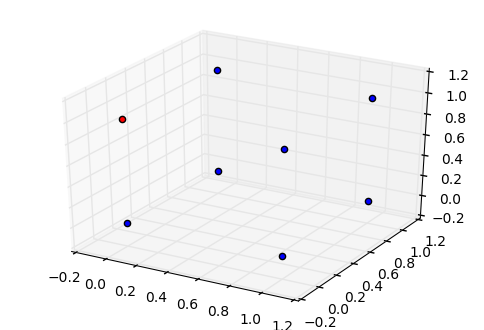

In [30]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def f1(x1, x2, x3):
    return x1 or x2 or not x3
        
def set_color(bit_value):
    if bit_value == 0:
        return 'r'
    else:
        return 'b'
    
functions = [f1]

for fun in functions:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(8):
        x1 = (i & 0b001)
        x2 = (i & 0b010) >> 1
        x3 = (i & 0b100) >> 2
        ax.scatter(x3, x2, x1, c=set_color(fun(x3, x2, x1)), marker='o')